In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import svm, metrics
from sklearn.model_selection import StratifiedKFold

import utils

In [2]:
random_seed = 42

In [3]:
X, y = pd.read_pickle("../data/training_data/train.pkl")

### Baseline model 
SVM from Sklearn
Evaluated using stratified K fold with 5 folds

In [5]:
results = []
skf = StratifiedKFold(n_splits=5, random_state=random_seed, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test, y_train, y_test = utils.check_and_swap_for_single_example(X_train, X_test, y_train, y_test, verbose=True)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({'fscore_micro': metrics.f1_score(y_test, y_pred, average='micro'),
                    'fscore_macro': metrics.f1_score(y_test, y_pred, average='macro'),
                    'accuracy': metrics.accuracy_score(y_test, y_pred),
                    'recall': metrics.recall_score(y_test, y_pred, average='macro'),
                    'precision': metrics.precision_score(y_test, y_pred, average='macro')
        })
    

c:\users\askib\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\askib\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\askib\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\askib\appdata\local\programs\python\python37\lib\site-packages\sklearn\metri

No need for swap
No need for swap
No need for swap
Swapping needed
No need for swap


Results

In [6]:
df_results = pd.DataFrame(results)
df_results.to_csv('results/SVM_metrics.csv')
df_results

fscore_micro  fscore_macro  accuracy    recall  precision
0      0.883026      0.753059  0.883026  0.729990   0.842448
1      0.882695      0.746150  0.882695  0.725465   0.822909
2      0.883856      0.740172  0.883856  0.712835   0.845629
3      0.886824      0.744849  0.886824  0.723561   0.827751
4      0.883837      0.745179  0.883837  0.727418   0.796077

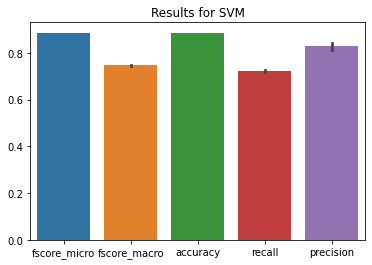

In [7]:
fig = sns.barplot(data=df_results)
fig.set_title('Results for SVM')
fig.figure.savefig('images/SVM_metrics.png')

In [8]:
df_results.mean(axis=0)

fscore_micro    0.884047
fscore_macro    0.745882
accuracy        0.884047
recall          0.723854
precision       0.826962
dtype: float64

Classification report

In [9]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.94      0.83      0.88        60
           2       0.79      0.94      0.86       403
           3       0.91      0.92      0.91       286
           4       0.95      0.86      0.90       147
           5       0.90      0.74      0.81        38
           6       0.93      0.98      0.95       505
           7       0.70      0.28      0.40        25
           8       0.93      0.99      0.96       235
           9       0.00      0.00      0.00        65
          10       0.00      0.00      0.00        68
          11       0.88      0.50      0.64        28
         

c:\users\askib\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix

In [11]:
c_m = metrics.confusion_matrix(y_test, y_pred)

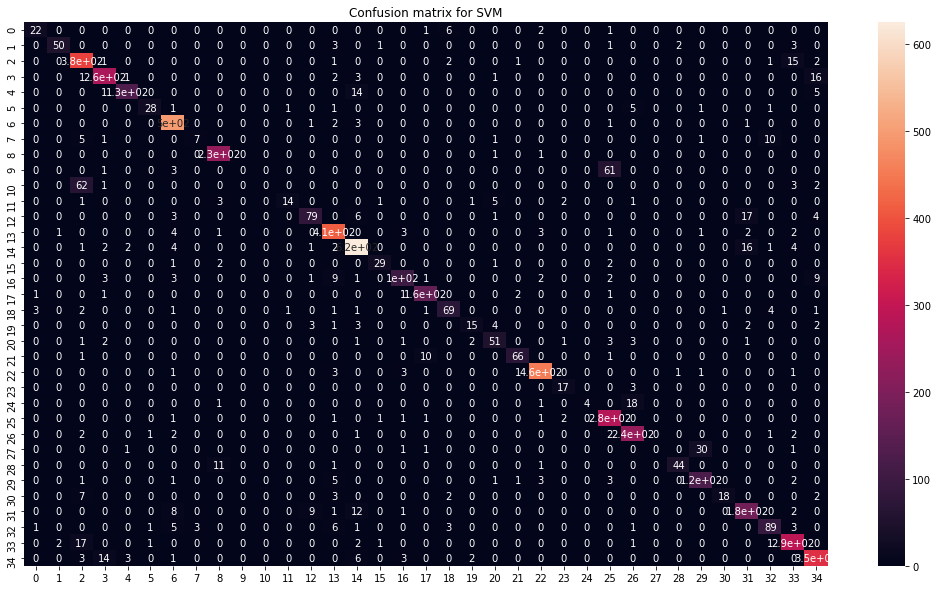

In [12]:
plt.figure(figsize=(18, 10))
fig = sns.heatmap(c_m, annot=True)
fig.set_title('Confusion matrix for SVM')
fig.figure.savefig('images/SVM_confusion_matrix.png')

Error analysis

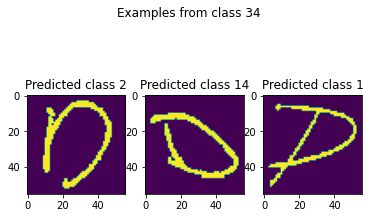

In [49]:
utils.plot_wrongly_predicted_from_class(X_test, y_test, y_pred, true_label=34, n_samples=3)

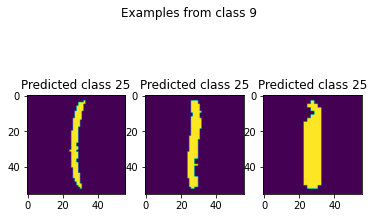

In [50]:
utils.plot_wrongly_predicted_from_class(X_test, y_test, y_pred, true_label=9, n_samples=3, shuffle=True)

Note: The highest number of error is between similar looking digits/letters: digit 0 and letter o, as well as digit 1 and letter i.
This is caused because in the dataset these classes have similar look and are indistinguishable by human eye.

In [ ]:
import joblib
_ = joblib.dump(clf, "models/svm.pkl")


In [40]:
model = pickle.load(open(filename, 'rb'))

In [ ]:
model = pickle.load(open(filename, 'rb'))